## Importing the libraries

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

## Loading the images

In [2]:
image = cv2.imread('D:/COMPUTER VISION MASTERCLASS/repo/Images/megan.jpg')

In [3]:
def imshow(image):
    cv2.imshow('window', image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [4]:
imshow(image)

In [5]:
image.shape, image.shape[0] * image.shape[1] * 3

((337, 600, 3), 606600)

In [6]:
image_blob = cv2.dnn.blobFromImage(image = image, scalefactor= 1.0/255, size = (image.shape[1], image.shape[0]))

In [7]:
type(image_blob), image_blob.shape

(numpy.ndarray, (1, 3, 337, 600))

## Loading the pretrained network

In [8]:
network = cv2.dnn.readNetFromCaffe('D:/COMPUTER VISION MASTERCLASS/repo/Weights/pose_deploy_linevec_faster_4_stages.prototxt',
                                   'D:/COMPUTER VISION MASTERCLASS/repo/Weights/pose_iter_160000.caffemodel')

In [9]:
network.getLayerNames()

('conv1_1',
 'relu1_1',
 'conv1_2',
 'relu1_2',
 'pool1_stage1',
 'conv2_1',
 'relu2_1',
 'conv2_2',
 'relu2_2',
 'pool2_stage1',
 'conv3_1',
 'relu3_1',
 'conv3_2',
 'relu3_2',
 'conv3_3',
 'relu3_3',
 'conv3_4',
 'relu3_4',
 'pool3_stage1',
 'conv4_1',
 'relu4_1',
 'conv4_2',
 'relu4_2',
 'conv4_3_CPM',
 'relu4_3_CPM',
 'conv4_4_CPM',
 'relu4_4_CPM',
 'conv5_1_CPM_L1',
 'relu5_1_CPM_L1',
 'conv5_1_CPM_L2',
 'relu5_1_CPM_L2',
 'conv5_2_CPM_L1',
 'relu5_2_CPM_L1',
 'conv5_2_CPM_L2',
 'relu5_2_CPM_L2',
 'conv5_3_CPM_L1',
 'relu5_3_CPM_L1',
 'conv5_3_CPM_L2',
 'relu5_3_CPM_L2',
 'conv5_4_CPM_L1',
 'relu5_4_CPM_L1',
 'conv5_4_CPM_L2',
 'relu5_4_CPM_L2',
 'conv5_5_CPM_L1',
 'conv5_5_CPM_L2',
 'concat_stage2',
 'Mconv1_stage2_L1',
 'Mrelu1_stage2_L1',
 'Mconv1_stage2_L2',
 'Mrelu1_stage2_L2',
 'Mconv2_stage2_L1',
 'Mrelu2_stage2_L1',
 'Mconv2_stage2_L2',
 'Mrelu2_stage2_L2',
 'Mconv3_stage2_L1',
 'Mrelu3_stage2_L1',
 'Mconv3_stage2_L2',
 'Mrelu3_stage2_L2',
 'Mconv4_stage2_L1',
 'Mrelu4_sta

In [10]:
len(network.getLayerNames())

127

## Predicting the body points

In [11]:
network.setInput(image_blob)
output = network.forward()

In [12]:
output.shape

(1, 44, 43, 75)

In [13]:
position_width = output.shape[3]
position_height = output.shape[2]

In [14]:
(600 * 28) / 75 # position of the head

224.0

In [21]:
num_points = 15
points = []
threshold = 0.10
for i in range(num_points):
    confidence_map = output[0, i, :, :]
    #print(confidence_map)
    #print(len(confidence_map))
    _, confidence, _ , point = cv2.minMaxLoc(confidence_map)
    #print(confidence)
    #print(point)
    x = int((image.shape[1] * point[0])/position_width)
    y = int((image.shape[0] * point[1])/position_height)
    #print(x, y)
    if confidence > threshold:
        cv2.circle(image, (x, y), 5, (0, 255, 0), thickness=-1)
        cv2.putText(image, '{}'.format(i), (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.7, (0, 0, 255))
        points.append((x, y))
    else:
        points.append(None)


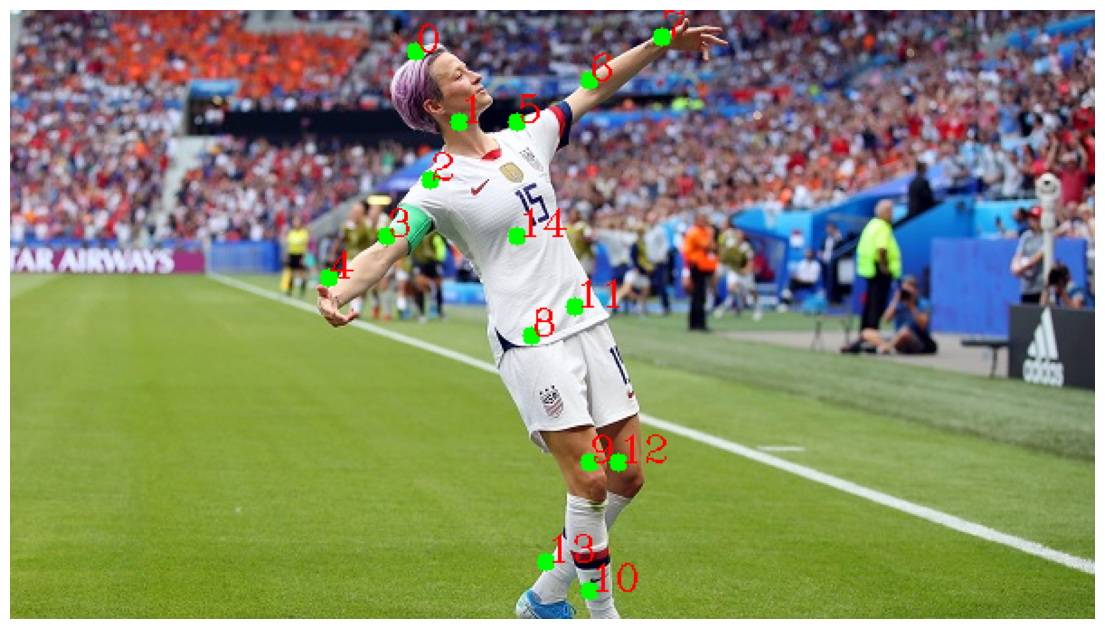

In [22]:
plt.figure(figsize=(14,10))
plt.axis('off')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [23]:
points_connections = [[0,1],[1,2],[2,3],[3,4],[1,5],[5,6],[6,7],[1,14],
                       [14,8],[8,9],[9,10],[14,11],[11,12],[12,13]]

In [24]:
points_connections

[[0, 1],
 [1, 2],
 [2, 3],
 [3, 4],
 [1, 5],
 [5, 6],
 [6, 7],
 [1, 14],
 [14, 8],
 [8, 9],
 [9, 10],
 [14, 11],
 [11, 12],
 [12, 13]]

In [25]:
for connection in points_connections:
    #print(connection)
    #print(connection[0])
    partsA = connection[0]
    partsB = connection[1]

    if points[partsA] and points[partsB]:
        cv2.line(image, points[partsA], points[partsB], (255,0,0))

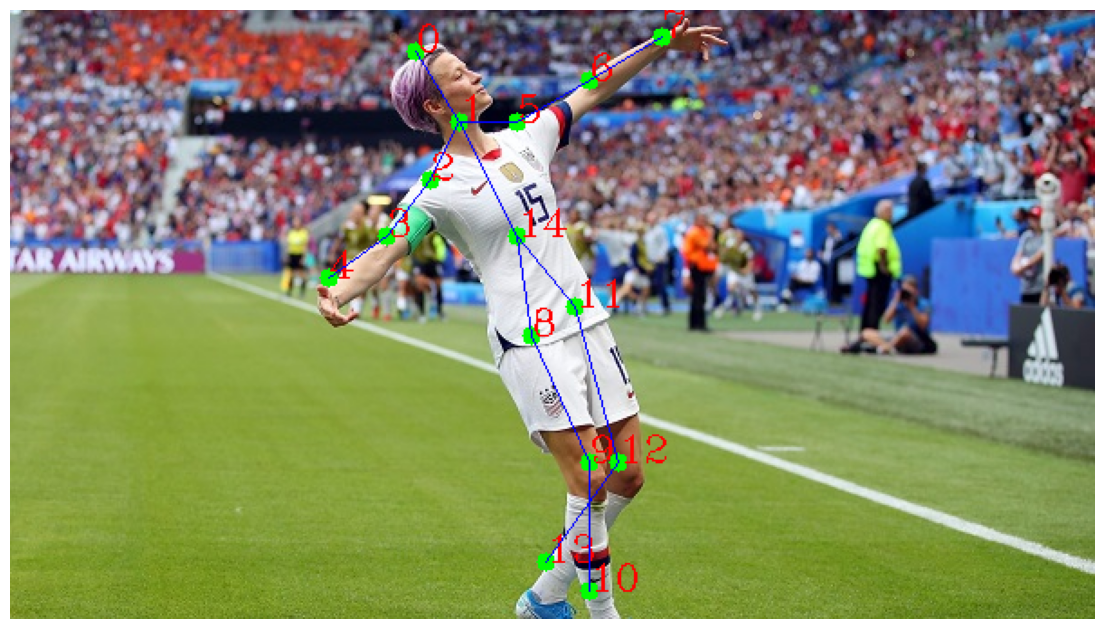

In [26]:
plt.figure(figsize=(14,10))
plt.axis('off')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

## Detecting movements

## Arms above the head in images

In [54]:
image_2 = cv2.imread('D:/COMPUTER VISION MASTERCLASS/repo/Images/player.jpg')
imshow(image_2)

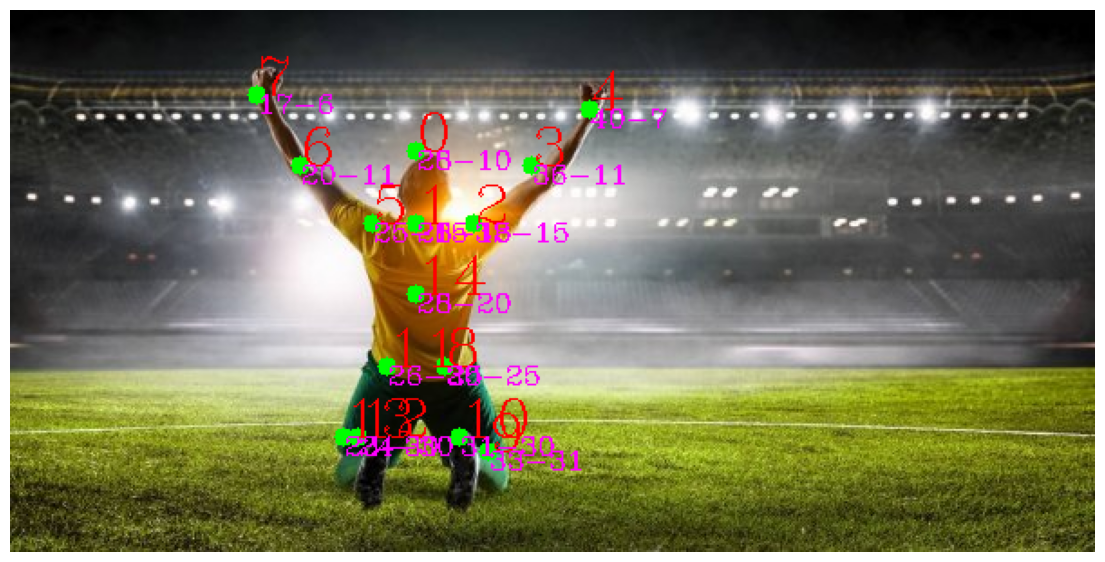

In [55]:
image_blob2 = cv2.dnn.blobFromImage(image = image_2, scalefactor= 1.0/255, size = (image_2.shape[1], image_2.shape[0]))
network.setInput(image_blob2)
output = network.forward()
#print(output.shape)
position_width = output.shape[3]
position_height = output.shape[2]
num_points = 15
points = []
threshold = 0.10
for i in range(num_points):
    confidence_map = output[0, i, :, :]
    _, confidence, _ , point = cv2.minMaxLoc(confidence_map)
    x = int((image_2.shape[1] * point[0])/position_width)
    y = int((image_2.shape[0] * point[1])/position_height)
    if confidence > threshold:
        cv2.circle(image_2, (x, y), 5, (0, 255, 0), thickness=-1)
        cv2.putText(image_2, '{}'.format(i), (x, y), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 255))
        cv2.putText(image_2, '{}-{}'.format(point[0],point[1]), (x, y+10), cv2.FONT_HERSHEY_COMPLEX, 0.5, (255,0,255))
        points.append((x, y))
    else:
        points.append(None)

plt.figure(figsize=(14,10))
plt.axis('off')
plt.imshow(cv2.cvtColor(image_2, cv2.COLOR_BGR2RGB))

In [93]:
def verify_arms_up(points):
    head, left_wrist, right_wrist = 0, 0, 0
    for i,point in enumerate(points):
        #print(i, point)
        if i == 0 :
            head = point[1] # Index 1 because we are measuring in Y-axis
        elif i == 4 :
            right_wrist = point[1]
        elif i == 7 :
            left_wrist = point[1]

    #print(head, right_wrist, left_wrist)
    if right_wrist < head and left_wrist < head:
        return True
    else:
        return False

In [40]:
verify_arms_up(points)

True

In [71]:
image_3 = cv2.imread('D:/COMPUTER VISION MASTERCLASS/repo/Images/jump.jpg')
imshow(image_3)

In [72]:
image_3.shape

(626, 1000, 3)

(1, 44, 79, 125)


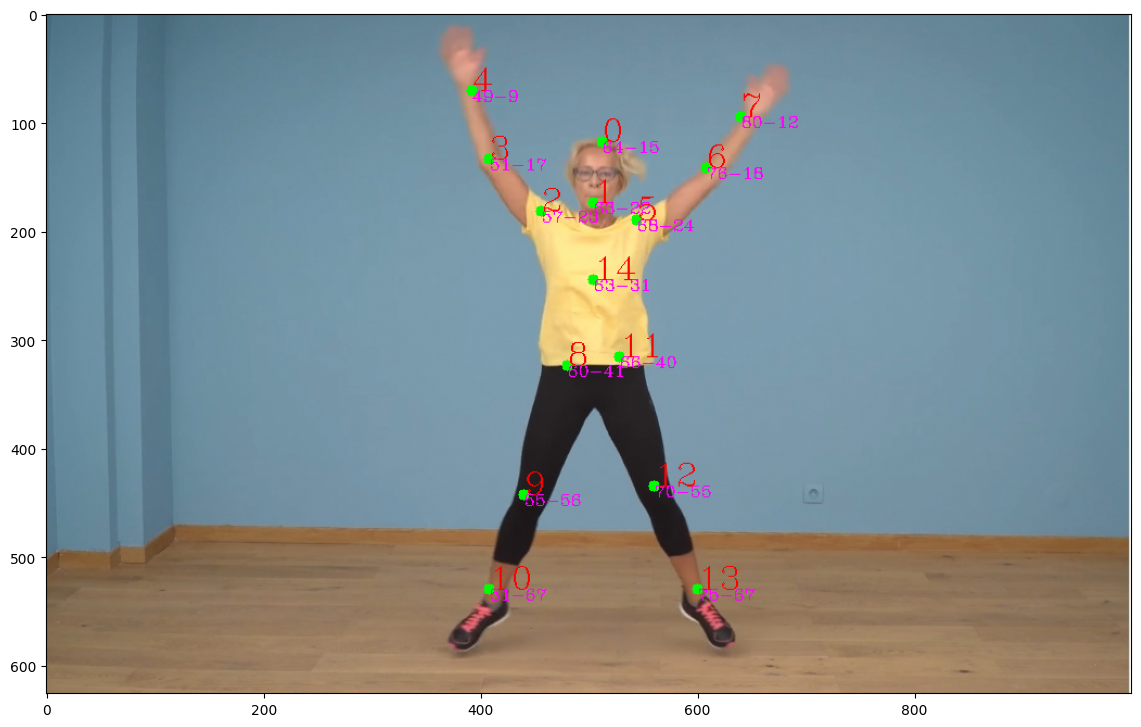

In [73]:
image_blob2 = cv2.dnn.blobFromImage(image = image_3, scalefactor= 1.0/255, size = (image_3.shape[1], image_3.shape[0]))
network.setInput(image_blob2)
output = network.forward()
print(output.shape)
position_width = output.shape[3]
position_height = output.shape[2]
num_points = 15
points = []
threshold = 0.10
for i in range(num_points):
    confidence_map = output[0, i, :, :]
    _, confidence, _ , point = cv2.minMaxLoc(confidence_map)
    x = int((image_3.shape[1] * point[0])/position_width)
    y = int((image_3.shape[0] * point[1])/position_height)
    if confidence > threshold:
        cv2.circle(image_3, (x, y), 5, (0, 255, 0), thickness=-1)
        cv2.putText(image_3, '{}'.format(i), (x, y), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 255))
        cv2.putText(image_3, '{}-{}'.format(point[0],point[1]), (x, y+10), cv2.FONT_HERSHEY_COMPLEX, 0.5, (255,0,255))
        points.append((x, y))
    else:
        points.append(None)

plt.figure(figsize=(14,10))
plt.imshow(cv2.cvtColor(image_3, cv2.COLOR_BGR2RGB))

In [91]:
def verify_legs_apart(points):
    left_hip, left_ankle, right_hip, right_ankle = 0, 0, 0, 0
    for i, point in enumerate(points):
        if i == 8:
            right_hip = point[0] # Index 0 because we are measuring in X-axis
        elif i == 11:
            left_hip = point[0]
        elif i == 10 :
            right_ankle = point[0]
        elif i == 13:
            left_ankle = point[0]
    #print(left_hip, right_hip, right_ankle, left_ankle)

    if (right_hip > right_ankle) and (left_hip < left_ankle):
        return True
    else:
        return False


In [92]:
verify_legs_apart(points)

True

## Arms above the head in Videos

In [100]:
video = 'D:/COMPUTER VISION MASTERCLASS/repo/Videos/gesture1.mp4'
capture = cv2.VideoCapture(video)
connected, frame = capture.read()

In [101]:
connected

True

In [102]:
frame.shape

(1080, 808, 3)

In [103]:
result = 'D:/COMPUTER VISION MASTERCLASS/Recognitions of gestures and actions/gesture_results.mp4'
save_video = cv2.VideoWriter(result, cv2.VideoWriter_fourcc(*'XVID'), 10, (frame.shape[1], frame.shape[0]))

In [104]:
threshold = 0.1
while cv2.waitKey(1) < 0 :
    connected, frame = capture.read()

    if not connected:
        break

    image_blob = cv2.dnn.blobFromImage(image = frame, scalefactor= 1.0/255, size = (256, 256))
    network.setInput(image_blob)
    output = network.forward()
    position_width = output.shape[3]
    position_height = output.shape[2]

    num_points = 15
    points = []

    for i in range(num_points):
        confidence_map = output[0, i, :, :]
        _, confidence, _ , point = cv2.minMaxLoc(confidence_map)
        x = int((frame.shape[1] * point[0])/position_width)
        y = int((frame.shape[0] * point[1])/position_height)
        if confidence > threshold:
            cv2.circle(frame, (x, y), 5, (0, 255, 0), thickness=-1)
            cv2.putText(frame, '{}'.format(i), (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.7, (0, 0, 255))
            points.append((x, y))
        else:
            points.append(None)

    for connection in points_connections:
        partsA = connection[0]
        partsB = connection[1]
        if points[partsA] and points[partsB]:
            cv2.line(frame, points[partsA], points[partsB], (255,0,0))

    if verify_arms_up(points) and verify_legs_apart(points) == True:
        cv2.putText(frame, 'Complete', (50,200), cv2.FONT_HERSHEY_COMPLEX,3, (255,0,0))

    save_video.write(frame)
save_video.release()